In [5]:
import cv2
import numpy as np

# Load the video file
video_path = 'Messi.mp4'  # Replace with your actual video file path
video = cv2.VideoCapture(video_path)

# Load the template image and get its dimensions
template = cv2.imread('M2.PNG',2)  # Replace 'SQ1.jpg' with your actual template image path
w, h = template.shape[::-1]

# Check if the video opened successfully
if not video.isOpened():
    print("Error: Could not open video.")
else:
    # Loop through each frame in the video
    while True:
        ret, frame = video.read()
        
        # Break the loop if there are no frames left
        if not ret:
            break
        
        # Convert the current frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Apply template matching
        result = cv2.matchTemplate(gray_frame, template, cv2.TM_CCOEFF_NORMED)
        threshold = 0.72# Define your matching threshold
        locations = np.where(result >= threshold)
        
        # Draw rectangles on matched regions
        for pt in zip(*locations[::-1]):
            cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
        
        # Display the result
        cv2.imshow("Template Matching", frame)
        
        # Break on pressing 'q'
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
    
    # Release the video object and close all windows
    video.release()
    cv2.destroyAllWindows()


## RESULT

Input Image
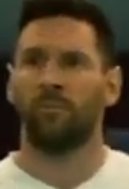

# OUTPUT

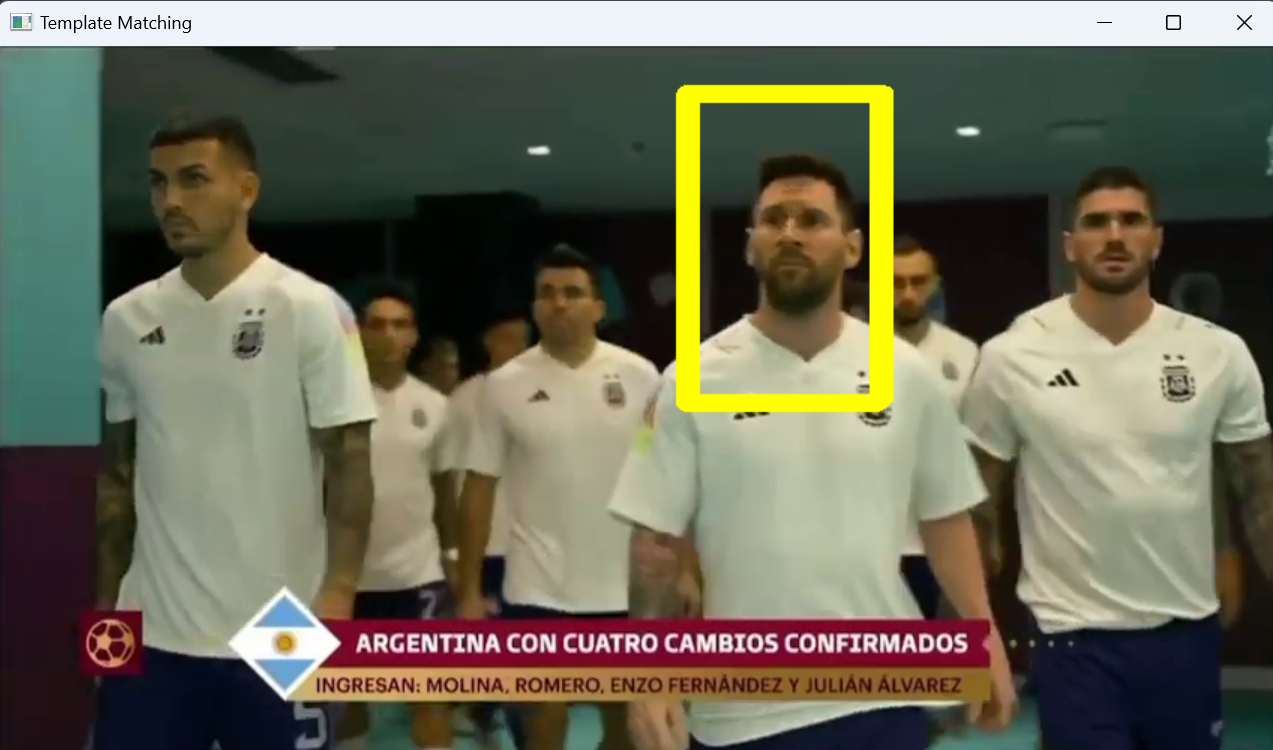